In [54]:
# Import Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt   
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 


from sklearn.metrics import mean_absolute_error, r2_score

In [55]:
# read the data.Data is available at kaggle
df = pd.read_csv('housingPrices.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [56]:
# Check to find the missing value in the dataset
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [60]:
# Find correlation of data variables with price feature
df.corr()['Price']

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

In comparison price has a high correlation with Avg. Area Income than other variables. We would plot the garph to see the linear relation of price with Avg. Area Inceom

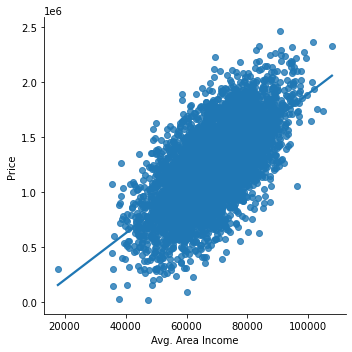

In [62]:
# plot 
sns.lmplot(x = 'Avg. Area Income', y = 'Price', data = df, fit_reg = True, ci = None)

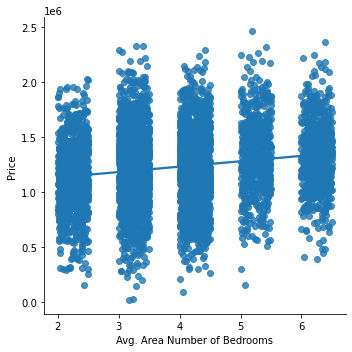

In [63]:
# Plot the price and Ave.Area  number of Bedrooms which has lowest correlation

sns.lmplot(x = 'Avg. Area Number of Bedrooms', y = 'Price', data = df, fit_reg = True, ci = None)

The graph doesnt show a linear relationship between Avg.Area Number of Bedrooms and Price

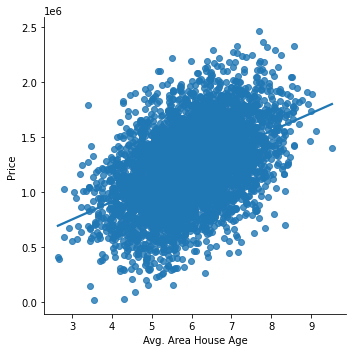

In [64]:
sns.lmplot(x = 'Avg. Area House Age', y = 'Price', data = df, fit_reg = True, ci = None)

In [72]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


(array([8.96814579e-09, 7.17451663e-08, 2.80458377e-07, 6.55489929e-07,
        1.07047049e-06, 1.02073805e-06, 6.46521783e-07, 2.55999798e-07,
        5.54394467e-08, 1.05987177e-08]),
 array([  15938.65792 ,  261251.351528,  506564.045136,  751876.738744,
         997189.432352, 1242502.12596 , 1487814.819568, 1733127.513176,
        1978440.206784, 2223752.900392, 2469065.594   ]),
 <BarContainer object of 10 artists>)

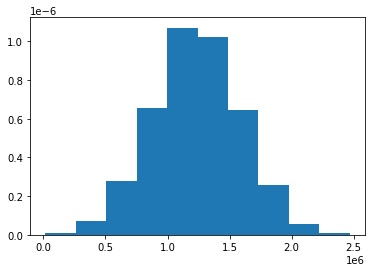

In [77]:
plt.hist(df['Price'], density = True)

In [78]:
df[df.isnull().any(axis = 1)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [79]:
# Assign the features variables as x and target variable as y
x = df[['Avg. Area Income', 'Avg. Area House Age']]
y = df['Price']

In [80]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

# Standardize 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [82]:

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

y_pred_lm = linear_model.predict(x_test)

mse_lm = mean_squared_error(y_test, y_pred_lm)
r2_lm = r2_score(y_test, y_pred_lm)

print(f"Mean Squared Error on Linear Regression: {mse_lm}")
print(f"R-Squared Value on Linear Regression:{r2_lm}")

Mean Squared Error on Linear Regression: 47682698441.06868
R-Squared Value on Linear Regression:0.6124380437343502
